In [1]:
from functions_ngates_v1 import calc_variance_ng, calc_variance_pure
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm.notebook import tqdm

In [6]:
N = 4
layers1 = np.arange(2, 30, 2)

In [7]:
sigma_x = th.tensor([[0, 1], [1, 0]], dtype=th.complex128)
sigma_z = th.tensor([[1, 0], [0, -1]], dtype=th.complex128)
id = th.eye(2, dtype=th.complex128)

theta = np.pi/2

generator = th.kron(id, sigma_x) - th.kron(sigma_z, sigma_x)

jumpOPs = th.empty(N-1, 2**N, 2**N, dtype=th.complex128, device='cpu')
identities = [th.eye(2**i, dtype=th.complex128) for i in range(N)]
for i in range(0,N-1):
    Id1 = identities[i]
    Id2 = identities[N-i-2]
    jumpOPs[i] = th.kron(Id1, th.kron(generator, Id2))

In [8]:
result1 = [calc_variance_pure(N, l, theta=np.pi/2, device='cpu', n_sim=1000)[:,-1] for l in tqdm(layers1)]

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
result2 = [calc_variance_ng(N, l, noise=(jumpOPs,True), theta=np.pi/2, device='cpu',n_sim=1000, n_sim_noise=500)[:,:,-1] for l in tqdm(layers1)]

  0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
th.save(result2, "result2.pt")

In [12]:
var1 = []
var2 = []
var0 = []

for l in range(len(layers1)):
    var1.append(th.std(result1[l]))
    var2.append(th.std(th.mean(result2[l], dim=1)))
    var0.append(th.std(result2[l][:,0]))

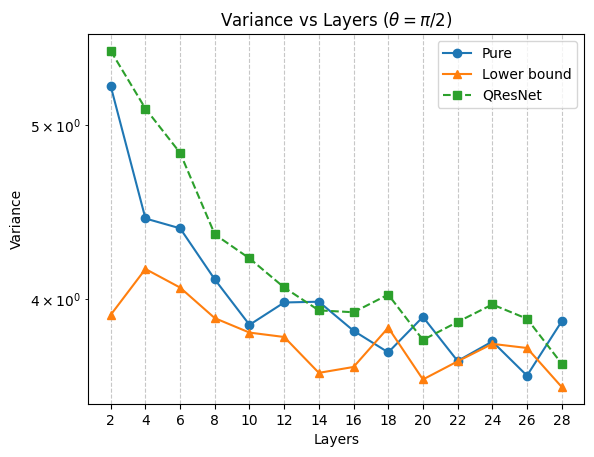

In [13]:
plt.semilogy(layers1, var1, marker='o', label='Pure')
plt.semilogy(layers1, var2, marker='^', label='Lower bound')
plt.semilogy(layers1, var0, marker='s', label='QResNet', linestyle='--')
plt.xlabel('Layers')
plt.grid(axis='x', which='both', linestyle='--', alpha=0.7)
plt.xticks(layers1)
plt.ylabel('Variance')
plt.title(r'Variance vs Layers ($\theta=\pi/2$)')
plt.legend()
plt.show()